<a href="https://colab.research.google.com/github/LiquidPunk/resume-projects/blob/main/EDA_XGBRegressor_used_cars_ph.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# For google colab
# Load the CSV file
df = pd.read_csv("/content/used_car_data_ph.csv")

# # For VSCode
# # P.S. Need to pip install dependencies and have Jupyter to run in VSCode
# # Load the CSV file
# df = pd.read_csv("/workspaces/128641386/project/Exploratory Data Analysis and Machine Learning/used_car_data_ph.csv")

# Displaying the first few rows of the dataframe to understand its content and if it loaded correctly
print(df.head())
print(df.shape)

            Car_Name     Car_Brand  Year Transmission  Mileage    Price
0  Aston-Martin Db11  Aston-Martin  2018    Automatic    14000  9000000
1            Audi A4          Audi  2009    Automatic    48000   650000
2            Audi A4          Audi  2013    Automatic    12345  1095000
3            Audi A4          Audi  2016    Automatic    12000  1350000
4            Audi A4          Audi  2016    Automatic    12852  1450000
(5196, 6)


In [ ]:
df.dtypes

Car_Name        object
Car_Brand       object
Year             int64
Transmission    object
Mileage          int64
Price            int64
dtype: object

In [ ]:
# Checking for missing values
print(df.isnull().sum())

Car_Name        0
Car_Brand       0
Year            0
Transmission    0
Mileage         0
Price           0
dtype: int64


In [ ]:
# Lets take a look at the max and nlargest values in 'Mileage' as it seems that the outliers for this dataset seem to be in the upper bracket
print(df.loc[df['Mileage'].idxmax()])
df.nlargest(25, 'Mileage')

Car_Name        Cadillac Escalade
Car_Brand                Cadillac
Year                         2020
Transmission            Automatic
Mileage                   7700000
Price                     7700000
Name: 88, dtype: object


,Car_Name,Car_Brand,Year,Transmission,Mileage,Price
88,Cadillac Escalade,Cadillac,2020,Automatic,7700000,7700000
759,Ford Transit,Ford,2016,Automatic,2880000,2880000
577,Ford Mustang,Ford,2016,Automatic,2580000,2580000
3119,Subaru Brz,Subaru,2018,Automatic,1680000,1680000
3112,Subaru Brz,Subaru,2016,Automatic,1380000,1380000
825,Geely Coolray,Geely,2022,Automatic,999999,958000
4753,Toyota Vios,Toyota,2019,Automatic,999990,548000
2603,Mitsubishi Montero Sport,Mitsubishi,2016,Automatic,968000,968000
2599,Mitsubishi Montero Sport,Mitsubishi,2016,Automatic,958000,958000
1139,Honda Civic,Honda,2017,Automatic,898999,898000


In [ ]:
# Seems like we have some instances where the 'Milage' is the same as 'Price', aswell as some unrealistic values for mileage

# We'll deal with these by updating the df to only contain rows where 'Price' != 'Mileage' and removing the rows where 'Mileage' <= 150,000
df = df[df['Price'] != df['Mileage']]
df = df[df['Mileage'] <= 150000]

# Let's look at the new size of the dataframe
print(df.shape)

(5136, 6)


In [ ]:
# # Variable set to the count of occurrences for each 'Car_Name'
# car_name_counts = df['Car_Name'].value_counts()

# # Filter the DataFrame to keep only rows where unique 'Car_Name' appears at least 5 times
# df = df[df['Car_Name'].isin(car_name_counts[car_name_counts >= 20].index)]

# # Let's take a look at the updated DataFrame
# print(df.shape)

In [ ]:
# # Function for removing outliers using IQR method
# def remove_outliers(df, column):
#     Q1 = df[column].quantile(0.25)
#     Q3 = df[column].quantile(0.75)
#     IQR = Q3 - Q1
#     lower_bound = Q1 - 1.5 * IQR
#     upper_bound = Q3 + 1.5 * IQR

#     return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# # Removing outliers from 'Mileage' and 'Price'
# df = remove_outliers(df, 'Mileage')
# df = remove_outliers(df, 'Price')

# # Let's look at the shape
# df.shape

# Let's try just removing the upper bound of price (did the same with mileage, just made everything worst except the mileage histogram.)
df = df[df['Price'] <= df['Price'].quantile(0.9)]

df.shape

(4622, 6)

**Exploratory Data Analysis (EDA)**

In [ ]:
# Summary statistics
print(df.describe())

              Year        Mileage         Price
count  4622.000000    4622.000000  4.622000e+03
mean   2017.389442   42998.174816  7.722221e+05
std       3.747581   28476.894028  2.990370e+05
min    1988.000000       0.000000  5.980000e+04
25%    2016.000000   20000.000000  5.500000e+05
50%    2018.000000   39000.000000  7.200000e+05
75%    2020.000000   60000.000000  9.680000e+05
max    2024.000000  150000.000000  1.628000e+06


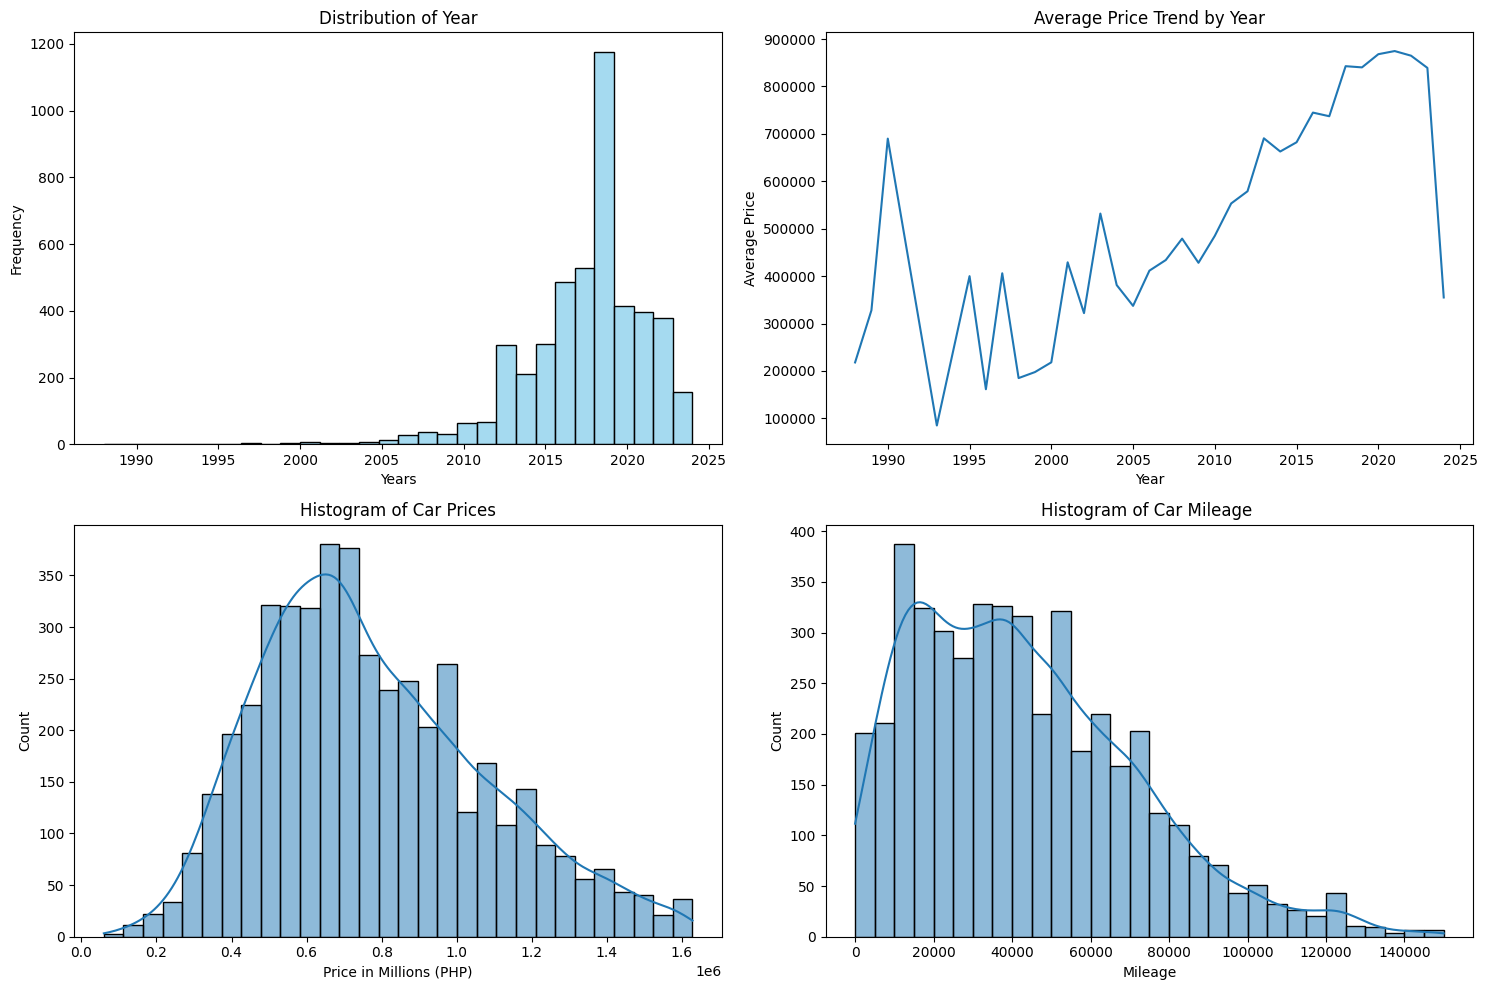

In [ ]:
# 2x2 subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

# Plotting distribution of Year
sns.histplot(df['Year'], kde=False, bins=30, color='skyblue', edgecolor='black', ax=axes[0, 0])
axes[0, 0].set_title('Distribution of Year')
axes[0, 0].set_xlabel('Years')
axes[0, 0].set_ylabel('Frequency')

# Trend Analysis - Average Price by Year
trend_data = df.groupby('Year')['Price'].mean().reset_index()
sns.lineplot(x='Year', y='Price', data=trend_data, ax=axes[0, 1])
axes[0, 1].set_title('Average Price Trend by Year')
axes[0, 1].set_xlabel('Year')
axes[0, 1].set_ylabel('Average Price')

# # Creating a copy of the main df to use for some of the graphs and to not potencially change and muddy up the original df
# df_capped = df.copy()

# # Capping price at 97th percentile for increased readability
# price_97th_percentile = df['Price'].quantile(0.97)
# df_capped['Modified_Price'] = df['Price'].apply(lambda x: x if x <= price_97th_percentile else price_97th_percentile)

# # Creating a histogram for price
# sns.histplot(df_capped['Modified_Price'], bins=30, kde=True, ax=axes[1, 0])
# axes[1, 0].set_title('Histogram of Car Prices (Capped at 97th Percentile)')
# axes[1, 0].set_xlabel('Price in Millions (PHP)')
# axes[1, 0].set_ylabel('Count')

# Creating a histogram for price
sns.histplot(df['Price'], bins=30, kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Histogram of Car Prices')
axes[1, 0].set_xlabel('Price in Millions (PHP)')
axes[1, 0].set_ylabel('Count')

# Creating a histogram for mileage
sns.histplot(df['Mileage'], bins=30, kde=True, ax=axes[1, 1])
axes[1, 1].set_title('Histogram of Car Mileage ')
axes[1, 1].set_xlabel('Mileage')
axes[1, 1].set_ylabel('Count')

# Spacing for the graphs
plt.tight_layout()

plt.show()


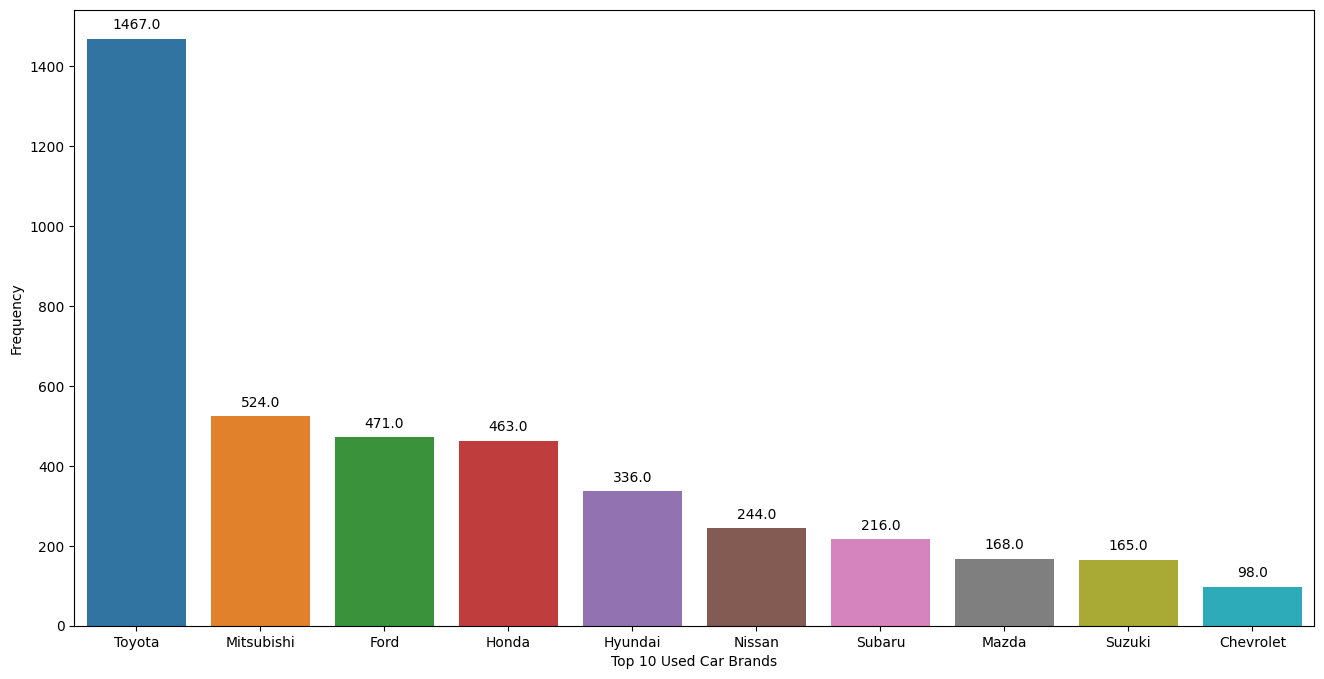

In [ ]:
# Creating variable for top 10 car brands in the dataframe
top10cars = (df
  .groupby("Car_Brand")
  .size()
  .reset_index(name='counts')
  .sort_values(by='counts', ascending=False)
  .head(10)
)

# Plotting most frequent Car Brands in the dataframe
plt.figure(figsize=(16, 8))
ax = sns.barplot(x=top10cars['Car_Brand'], y=top10cars['counts'])
plt.xlabel('Top 10 Used Car Brands')
plt.ylabel('Frequency')
plt.xticks(rotation=0)

# Adding values on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()


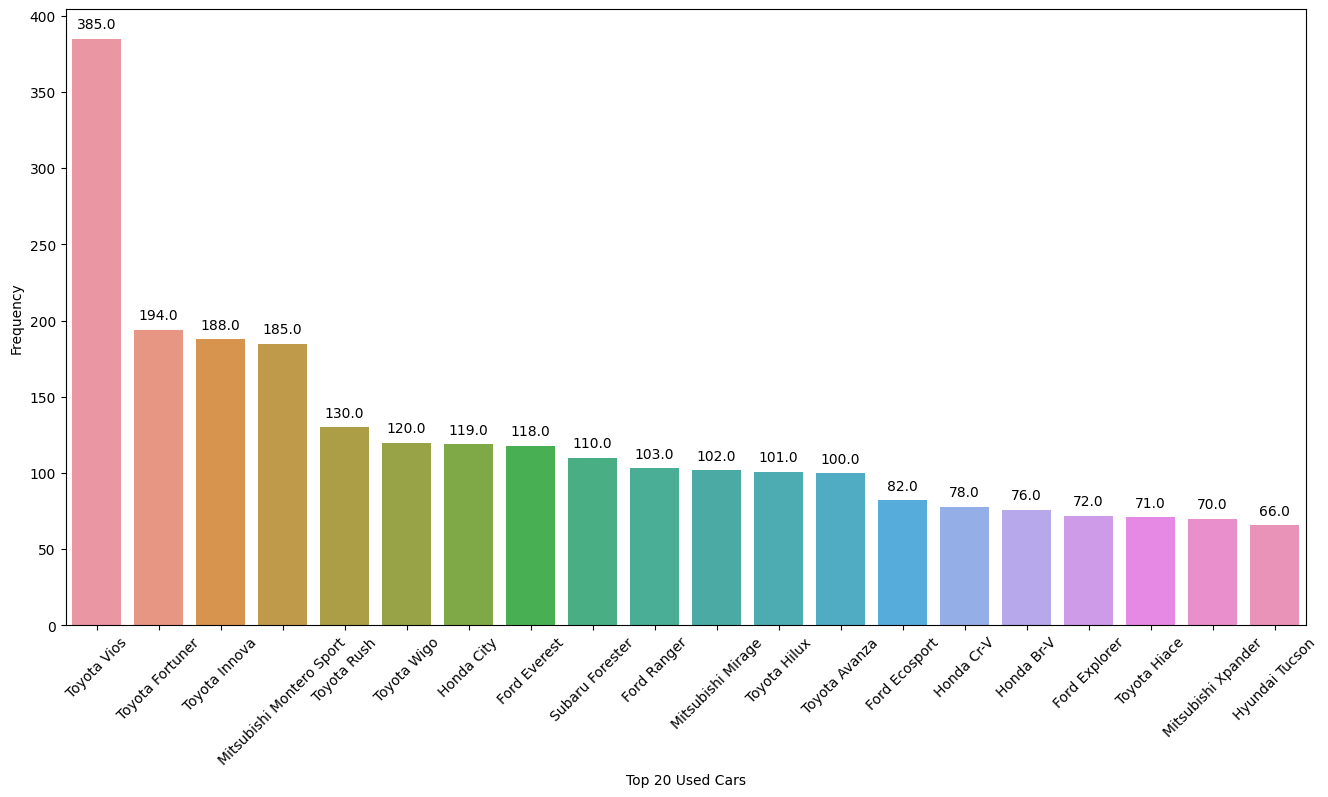

In [ ]:
# Creating variable for top 20 cars in the dataframe
top20cars = (df
  .groupby("Car_Name")
  .size()
  .reset_index(name='counts')
  .sort_values(by='counts', ascending=False)
  .head(20)
)

# Plotting most frequent Cars in the dataframe
plt.figure(figsize=(16, 8))
ax = sns.barplot(x=top20cars['Car_Name'], y=top20cars['counts'])
plt.xlabel('Top 20 Used Cars')
plt.ylabel('Frequency')
plt.xticks(rotation=45)

# Adding values on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()


**PRICE PREDICTION | XGBRegressor**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, r2_score
import numpy as np
from sklearn.preprocessing import LabelEncoder

# Creating a LabelEncoder object
le = LabelEncoder()

# Using LabelEncoder to create numerical format of 'Car_Name' column
df['Car_Name_Label'] = le.fit_transform(df['Car_Name'])

# 'Car_Brand' is being label encoded for correlation analysis and is not used in training the model, as it appears to affect the model's accuracy
# The same effect was not observed when label encoding 'Car_Name' so we will just be using its label encoding
df['Car_Brand_Label'] = le.fit_transform(df['Car_Brand'])

# Dropping 'Car_Name' column
df_encoded = df.drop(['Car_Name', 'Transmission'], axis=1) # Transmission is being removed from the testing as I found most CVTs were mislabeled as ATs bringing its relevance to the dataset in question

# Converting other categorical variables into numeric format
df_encoded = pd.get_dummies(df_encoded, columns=['Car_Brand'])

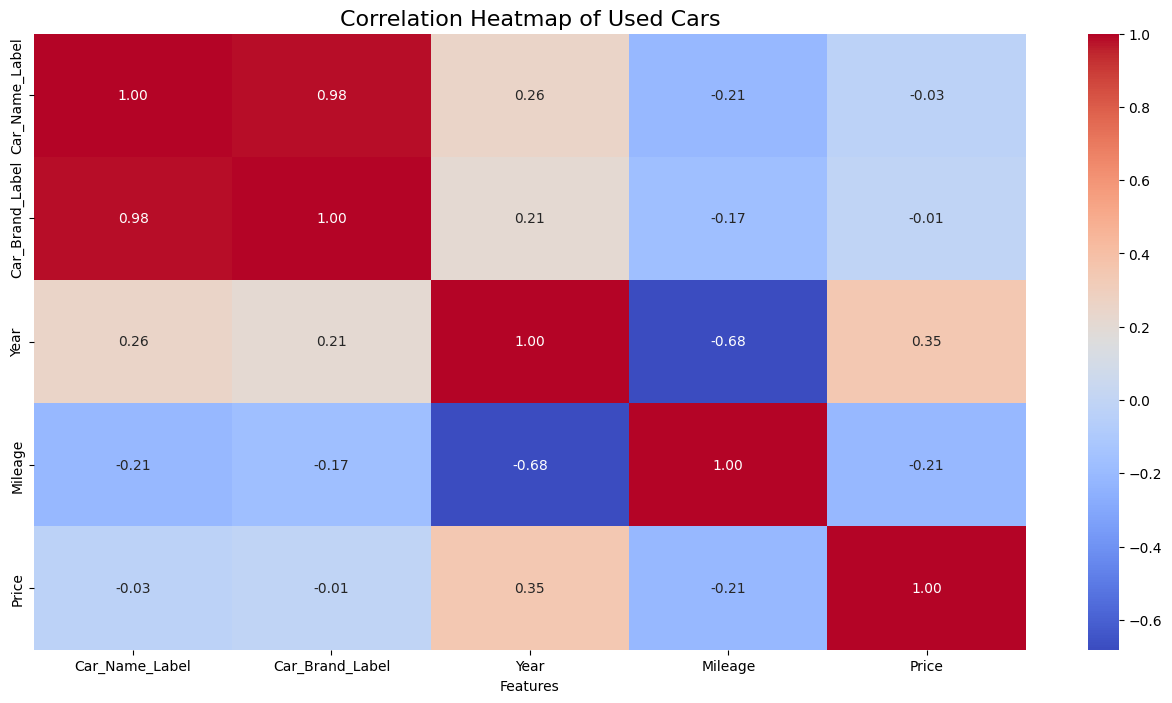

In [ ]:
plt.figure(figsize=(16, 8))

# Looking at the correlation of variables
corr_df = df_encoded[['Car_Name_Label', 'Car_Brand_Label', 'Year', 'Mileage', 'Price']].corr(method='spearman') #methods{‘pearson’, ‘kendall’, ‘spearman’}

heatmap_corr = sns.heatmap(corr_df, annot=True, cmap='coolwarm', fmt=".2f")
heatmap_corr.set_title("Correlation Heatmap of Used Cars", fontsize=16)
heatmap_corr.set_xlabel("Features")

plt.show()


In [ ]:
# # Can't seem to get plotly to work on vscode
# import plotly.express as px
# # Scatter Plot for Mileage vs. Year
# fig = px.scatter(df, x='Year', y='Mileage',
#                  title='Scatter Plot of Mileage vs. Year',
#                  labels={'Year': 'Year', 'Mileage': 'Mileage'})

# fig.show()

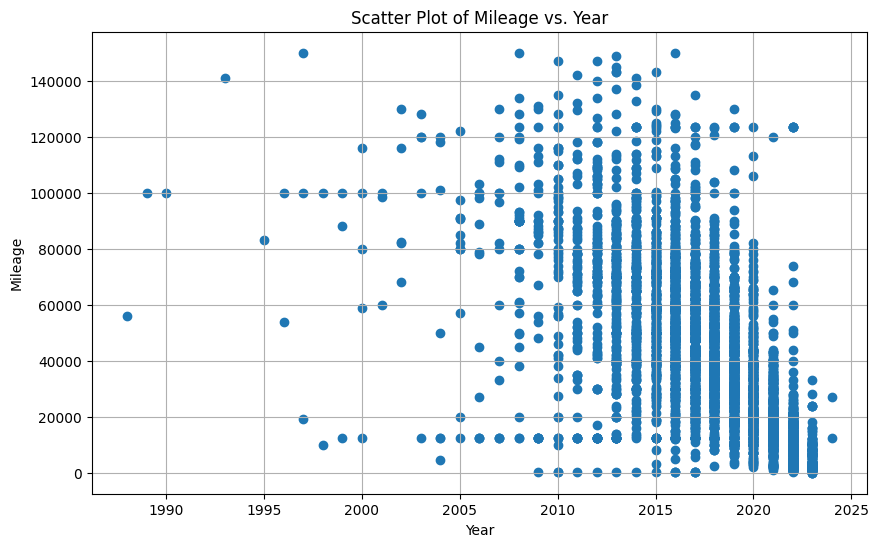

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Year'], df['Mileage'])
plt.title('Scatter Plot of Mileage vs. Year')
plt.xlabel('Year')
plt.ylabel('Mileage')
plt.grid(True)

plt.show()

In [ ]:
# # Scatter Plot for Mileage vs. Year
# fig = px.scatter(df, x='Year', y='Price',
#                  title='Scatter Plot of Price vs. Year',
#                  labels={'Year': 'Year', 'Price': 'Price (PHP)'})

# fig.show()


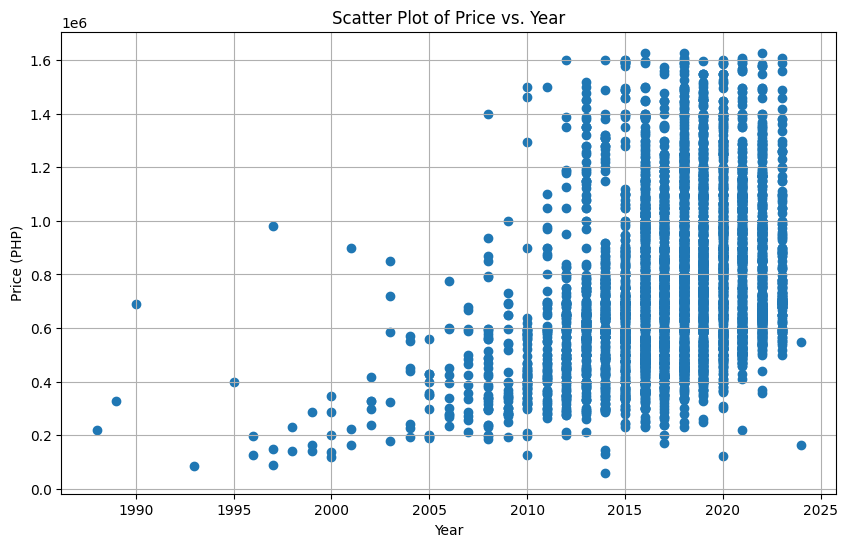

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Year'], df['Price'])
plt.title('Scatter Plot of Price vs. Year')
plt.xlabel('Year')
plt.ylabel('Price (PHP)')
plt.grid(True)
plt.show()

In [ ]:
# looking at the features in the encoded dataframe
df_encoded.columns

Index(['Year', 'Mileage', 'Price', 'Car_Name_Label', 'Car_Brand_Label',
       'Car_Brand_Audi', 'Car_Brand_BMW', 'Car_Brand_Changan',
       'Car_Brand_Chery', 'Car_Brand_Chevrolet', 'Car_Brand_Chrysler',
       'Car_Brand_Dodge', 'Car_Brand_Fiat', 'Car_Brand_Ford',
       'Car_Brand_Foton', 'Car_Brand_Gac', 'Car_Brand_Geely',
       'Car_Brand_Greatwall', 'Car_Brand_Hino', 'Car_Brand_Honda',
       'Car_Brand_Hyundai', 'Car_Brand_Isuzu', 'Car_Brand_Jac',
       'Car_Brand_Jaguar', 'Car_Brand_Jeep', 'Car_Brand_Jmc', 'Car_Brand_Kia',
       'Car_Brand_Lexus', 'Car_Brand_Maxus', 'Car_Brand_Mazda',
       'Car_Brand_Mercedes-Benz', 'Car_Brand_Mg', 'Car_Brand_Mini-Cooper',
       'Car_Brand_Mitsubishi', 'Car_Brand_Nissan', 'Car_Brand_Peugeot',
       'Car_Brand_Subaru', 'Car_Brand_Suzuki', 'Car_Brand_Tata',
       'Car_Brand_Toyota', 'Car_Brand_Volkswagen', 'Car_Brand_Volvo'],
      dtype='object')

In [ ]:
# Assigning X and y variables for the model
X = df_encoded.drop(df[['Price', 'Car_Brand_Label']], axis=1)
y = df_encoded['Price']

In [ ]:
# # Train test splits
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# # Random Forest Model initialization and fitting
# random_forest = RandomForestRegressor(n_estimators=200, random_state=0)
# random_forest.fit(X_train, y_train)

# # Predictions on test set
# y_pred = random_forest.predict(X_test)

# # Let's evaluate the model
# mae = mean_absolute_error(y_test, y_pred)
# r2 = r2_score(y_test, y_pred)

# print(f"Mean Absolute Error: {mae}")
# print(f"R-squared: {r2}")

In [ ]:
from xgboost import XGBRegressor

# Train test splits
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Initialize XGBoost Regressor and fitting
xgb_model = XGBRegressor()
xgb_model.fit(X_train, y_train)

# Predictions on test set
y_pred = xgb_model.predict(X_test)

# Evaluating the model
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("-----------------------------------")
print("Model Evaluation:")
print(f"  Mean Absolute Error: {mae:.2f}")
print(f"  R-squared: {r2 * 100:.4f}%")
print("-----------------------------------")



-----------------------------------
Model Evaluation:
  Mean Absolute Error: 88485.34
  R-squared: 80.4615%
-----------------------------------


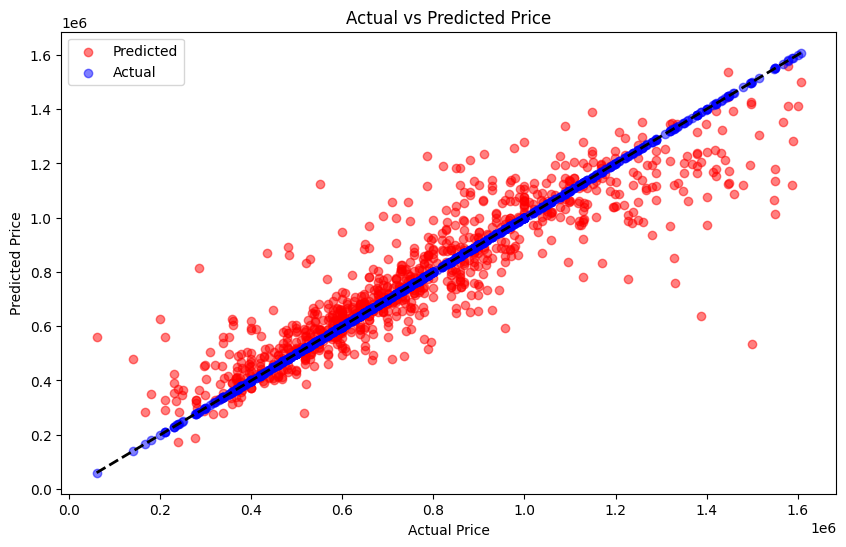

In [ ]:
# Scatter plot of actual vs predicted prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='red', label='Predicted')
plt.scatter(y_test, y_test, alpha=0.5, color='blue', label='Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Price')
plt.legend()

plt.show()


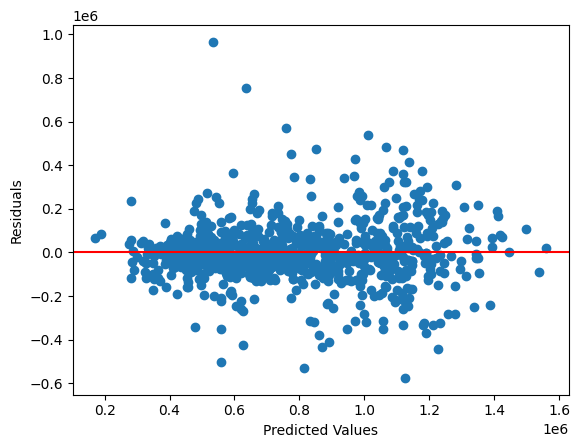

In [ ]:
# Residual Plot
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='-')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')

plt.show()


In [ ]:
# Changing the display format for more readable
pd.options.display.float_format = '{:.2f}'.format

# Displaying more readable results and corresponding Car_Name_Label
pred_y_df = pd.DataFrame({'Actual Value': y_test, 'Predicted value': y_pred, 'Difference': y_test - y_pred, 'Car_Name_Label': X_test['Car_Name_Label']})
pred_y_df[0:60]

,Actual Value,Predicted value,Difference,Car_Name_Label
1044,588000,617594.19,-29594.19,74
3462,580000,606061.06,-26061.06,214
470,728000,742829.94,-14829.94,48
199,1236300,978483.12,257816.88,33
4345,1010000,1058471.38,-48471.38,233
3041,1250000,992968.25,257031.75,189
665,1018000,1104989.00,-86989.00,54
804,828000,835013.19,-7013.19,65
2146,648000,709694.19,-61694.19,146
1783,978000,886882.50,91117.50,111


In [ ]:
label_value = (129) # Replace with Car_Name_Label you'd like to find

print(df.loc[df['Car_Name_Label'] == label_value, 'Car_Name'].iloc[0])

Kia Soluto
